In [1]:
import sys
import os
import os.path

sys.path.insert(1, os.path.join(sys.path[0], ".."))
from data_utils import utils as data_utils
from PIL import Image
import numpy as np
from tqdm import tqdm
import random
import sklearn.metrics
import torch.utils.data as data
try:
    import faiss
    USE_FAISS = 1
except:
    print('Faiss library not found!')
    USE_FAISS = 0
import h5py as h5
import torch

IMG_EXTENSIONS = [".jpg", ".jpeg", ".png", ".ppm", ".bmp", ".pgm"]

imagenet_idx = {'n01440764': 0,
 'n01443537': 1,
 'n01484850': 2,
 'n01491361': 3,
 'n01494475': 4,
 'n01496331': 5,
 'n01498041': 6,
 'n01514668': 7,
 'n01514859': 8,
 'n01518878': 9,
 'n01530575': 10,
 'n01531178': 11,
 'n01532829': 12,
 'n01534433': 13,
 'n01537544': 14,
 'n01558993': 15,
 'n01560419': 16,
 'n01580077': 17,
 'n01582220': 18,
 'n01592084': 19,
 'n01601694': 20,
 'n01608432': 21,
 'n01614925': 22,
 'n01616318': 23,
 'n01622779': 24,
 'n01629819': 25,
 'n01630670': 26,
 'n01631663': 27,
 'n01632458': 28,
 'n01632777': 29,
 'n01641577': 30,
 'n01644373': 31,
 'n01644900': 32,
 'n01664065': 33,
 'n01665541': 34,
 'n01667114': 35,
 'n01667778': 36,
 'n01669191': 37,
 'n01675722': 38,
 'n01677366': 39,
 'n01682714': 40,
 'n01685808': 41,
 'n01687978': 42,
 'n01688243': 43,
 'n01689811': 44,
 'n01692333': 45,
 'n01693334': 46,
 'n01694178': 47,
 'n01695060': 48,
 'n01697457': 49,
 'n01698640': 50,
 'n01704323': 51,
 'n01728572': 52,
 'n01728920': 53,
 'n01729322': 54,
 'n01729977': 55,
 'n01734418': 56,
 'n01735189': 57,
 'n01737021': 58,
 'n01739381': 59,
 'n01740131': 60,
 'n01742172': 61,
 'n01744401': 62,
 'n01748264': 63,
 'n01749939': 64,
 'n01751748': 65,
 'n01753488': 66,
 'n01755581': 67,
 'n01756291': 68,
 'n01768244': 69,
 'n01770081': 70,
 'n01770393': 71,
 'n01773157': 72,
 'n01773549': 73,
 'n01773797': 74,
 'n01774384': 75,
 'n01774750': 76,
 'n01775062': 77,
 'n01776313': 78,
 'n01784675': 79,
 'n01795545': 80,
 'n01796340': 81,
 'n01797886': 82,
 'n01798484': 83,
 'n01806143': 84,
 'n01806567': 85,
 'n01807496': 86,
 'n01817953': 87,
 'n01818515': 88,
 'n01819313': 89,
 'n01820546': 90,
 'n01824575': 91,
 'n01828970': 92,
 'n01829413': 93,
 'n01833805': 94,
 'n01843065': 95,
 'n01843383': 96,
 'n01847000': 97,
 'n01855032': 98,
 'n01855672': 99,
 'n01860187': 100,
 'n01871265': 101,
 'n01872401': 102,
 'n01873310': 103,
 'n01877812': 104,
 'n01882714': 105,
 'n01883070': 106,
 'n01910747': 107,
 'n01914609': 108,
 'n01917289': 109,
 'n01924916': 110,
 'n01930112': 111,
 'n01943899': 112,
 'n01944390': 113,
 'n01945685': 114,
 'n01950731': 115,
 'n01955084': 116,
 'n01968897': 117,
 'n01978287': 118,
 'n01978455': 119,
 'n01980166': 120,
 'n01981276': 121,
 'n01983481': 122,
 'n01984695': 123,
 'n01985128': 124,
 'n01986214': 125,
 'n01990800': 126,
 'n02002556': 127,
 'n02002724': 128,
 'n02006656': 129,
 'n02007558': 130,
 'n02009229': 131,
 'n02009912': 132,
 'n02011460': 133,
 'n02012849': 134,
 'n02013706': 135,
 'n02017213': 136,
 'n02018207': 137,
 'n02018795': 138,
 'n02025239': 139,
 'n02027492': 140,
 'n02028035': 141,
 'n02033041': 142,
 'n02037110': 143,
 'n02051845': 144,
 'n02056570': 145,
 'n02058221': 146,
 'n02066245': 147,
 'n02071294': 148,
 'n02074367': 149,
 'n02077923': 150,
 'n02085620': 151,
 'n02085782': 152,
 'n02085936': 153,
 'n02086079': 154,
 'n02086240': 155,
 'n02086646': 156,
 'n02086910': 157,
 'n02087046': 158,
 'n02087394': 159,
 'n02088094': 160,
 'n02088238': 161,
 'n02088364': 162,
 'n02088466': 163,
 'n02088632': 164,
 'n02089078': 165,
 'n02089867': 166,
 'n02089973': 167,
 'n02090379': 168,
 'n02090622': 169,
 'n02090721': 170,
 'n02091032': 171,
 'n02091134': 172,
 'n02091244': 173,
 'n02091467': 174,
 'n02091635': 175,
 'n02091831': 176,
 'n02092002': 177,
 'n02092339': 178,
 'n02093256': 179,
 'n02093428': 180,
 'n02093647': 181,
 'n02093754': 182,
 'n02093859': 183,
 'n02093991': 184,
 'n02094114': 185,
 'n02094258': 186,
 'n02094433': 187,
 'n02095314': 188,
 'n02095570': 189,
 'n02095889': 190,
 'n02096051': 191,
 'n02096177': 192,
 'n02096294': 193,
 'n02096437': 194,
 'n02096585': 195,
 'n02097047': 196,
 'n02097130': 197,
 'n02097209': 198,
 'n02097298': 199,
 'n02097474': 200,
 'n02097658': 201,
 'n02098105': 202,
 'n02098286': 203,
 'n02098413': 204,
 'n02099267': 205,
 'n02099429': 206,
 'n02099601': 207,
 'n02099712': 208,
 'n02099849': 209,
 'n02100236': 210,
 'n02100583': 211,
 'n02100735': 212,
 'n02100877': 213,
 'n02101006': 214,
 'n02101388': 215,
 'n02101556': 216,
 'n02102040': 217,
 'n02102177': 218,
 'n02102318': 219,
 'n02102480': 220,
 'n02102973': 221,
 'n02104029': 222,
 'n02104365': 223,
 'n02105056': 224,
 'n02105162': 225,
 'n02105251': 226,
 'n02105412': 227,
 'n02105505': 228,
 'n02105641': 229,
 'n02105855': 230,
 'n02106030': 231,
 'n02106166': 232,
 'n02106382': 233,
 'n02106550': 234,
 'n02106662': 235,
 'n02107142': 236,
 'n02107312': 237,
 'n02107574': 238,
 'n02107683': 239,
 'n02107908': 240,
 'n02108000': 241,
 'n02108089': 242,
 'n02108422': 243,
 'n02108551': 244,
 'n02108915': 245,
 'n02109047': 246,
 'n02109525': 247,
 'n02109961': 248,
 'n02110063': 249,
 'n02110185': 250,
 'n02110341': 251,
 'n02110627': 252,
 'n02110806': 253,
 'n02110958': 254,
 'n02111129': 255,
 'n02111277': 256,
 'n02111500': 257,
 'n02111889': 258,
 'n02112018': 259,
 'n02112137': 260,
 'n02112350': 261,
 'n02112706': 262,
 'n02113023': 263,
 'n02113186': 264,
 'n02113624': 265,
 'n02113712': 266,
 'n02113799': 267,
 'n02113978': 268,
 'n02114367': 269,
 'n02114548': 270,
 'n02114712': 271,
 'n02114855': 272,
 'n02115641': 273,
 'n02115913': 274,
 'n02116738': 275,
 'n02117135': 276,
 'n02119022': 277,
 'n02119789': 278,
 'n02120079': 279,
 'n02120505': 280,
 'n02123045': 281,
 'n02123159': 282,
 'n02123394': 283,
 'n02123597': 284,
 'n02124075': 285,
 'n02125311': 286,
 'n02127052': 287,
 'n02128385': 288,
 'n02128757': 289,
 'n02128925': 290,
 'n02129165': 291,
 'n02129604': 292,
 'n02130308': 293,
 'n02132136': 294,
 'n02133161': 295,
 'n02134084': 296,
 'n02134418': 297,
 'n02137549': 298,
 'n02138441': 299,
 'n02165105': 300,
 'n02165456': 301,
 'n02167151': 302,
 'n02168699': 303,
 'n02169497': 304,
 'n02172182': 305,
 'n02174001': 306,
 'n02177972': 307,
 'n02190166': 308,
 'n02206856': 309,
 'n02219486': 310,
 'n02226429': 311,
 'n02229544': 312,
 'n02231487': 313,
 'n02233338': 314,
 'n02236044': 315,
 'n02256656': 316,
 'n02259212': 317,
 'n02264363': 318,
 'n02268443': 319,
 'n02268853': 320,
 'n02276258': 321,
 'n02277742': 322,
 'n02279972': 323,
 'n02280649': 324,
 'n02281406': 325,
 'n02281787': 326,
 'n02317335': 327,
 'n02319095': 328,
 'n02321529': 329,
 'n02325366': 330,
 'n02326432': 331,
 'n02328150': 332,
 'n02342885': 333,
 'n02346627': 334,
 'n02356798': 335,
 'n02361337': 336,
 'n02363005': 337,
 'n02364673': 338,
 'n02389026': 339,
 'n02391049': 340,
 'n02395406': 341,
 'n02396427': 342,
 'n02397096': 343,
 'n02398521': 344,
 'n02403003': 345,
 'n02408429': 346,
 'n02410509': 347,
 'n02412080': 348,
 'n02415577': 349,
 'n02417914': 350,
 'n02422106': 351,
 'n02422699': 352,
 'n02423022': 353,
 'n02437312': 354,
 'n02437616': 355,
 'n02441942': 356,
 'n02442845': 357,
 'n02443114': 358,
 'n02443484': 359,
 'n02444819': 360,
 'n02445715': 361,
 'n02447366': 362,
 'n02454379': 363,
 'n02457408': 364,
 'n02480495': 365,
 'n02480855': 366,
 'n02481823': 367,
 'n02483362': 368,
 'n02483708': 369,
 'n02484975': 370,
 'n02486261': 371,
 'n02486410': 372,
 'n02487347': 373,
 'n02488291': 374,
 'n02488702': 375,
 'n02489166': 376,
 'n02490219': 377,
 'n02492035': 378,
 'n02492660': 379,
 'n02493509': 380,
 'n02493793': 381,
 'n02494079': 382,
 'n02497673': 383,
 'n02500267': 384,
 'n02504013': 385,
 'n02504458': 386,
 'n02509815': 387,
 'n02510455': 388,
 'n02514041': 389,
 'n02526121': 390,
 'n02536864': 391,
 'n02606052': 392,
 'n02607072': 393,
 'n02640242': 394,
 'n02641379': 395,
 'n02643566': 396,
 'n02655020': 397,
 'n02666196': 398,
 'n02667093': 399,
 'n02669723': 400,
 'n02672831': 401,
 'n02676566': 402,
 'n02687172': 403,
 'n02690373': 404,
 'n02692877': 405,
 'n02699494': 406,
 'n02701002': 407,
 'n02704792': 408,
 'n02708093': 409,
 'n02727426': 410,
 'n02730930': 411,
 'n02747177': 412,
 'n02749479': 413,
 'n02769748': 414,
 'n02776631': 415,
 'n02777292': 416,
 'n02782093': 417,
 'n02783161': 418,
 'n02786058': 419,
 'n02787622': 420,
 'n02788148': 421,
 'n02790996': 422,
 'n02791124': 423,
 'n02791270': 424,
 'n02793495': 425,
 'n02794156': 426,
 'n02795169': 427,
 'n02797295': 428,
 'n02799071': 429,
 'n02802426': 430,
 'n02804414': 431,
 'n02804610': 432,
 'n02807133': 433,
 'n02808304': 434,
 'n02808440': 435,
 'n02814533': 436,
 'n02814860': 437,
 'n02815834': 438,
 'n02817516': 439,
 'n02823428': 440,
 'n02823750': 441,
 'n02825657': 442,
 'n02834397': 443,
 'n02835271': 444,
 'n02837789': 445,
 'n02840245': 446,
 'n02841315': 447,
 'n02843684': 448,
 'n02859443': 449,
 'n02860847': 450,
 'n02865351': 451,
 'n02869837': 452,
 'n02870880': 453,
 'n02871525': 454,
 'n02877765': 455,
 'n02879718': 456,
 'n02883205': 457,
 'n02892201': 458,
 'n02892767': 459,
 'n02894605': 460,
 'n02895154': 461,
 'n02906734': 462,
 'n02909870': 463,
 'n02910353': 464,
 'n02916936': 465,
 'n02917067': 466,
 'n02927161': 467,
 'n02930766': 468,
 'n02939185': 469,
 'n02948072': 470,
 'n02950826': 471,
 'n02951358': 472,
 'n02951585': 473,
 'n02963159': 474,
 'n02965783': 475,
 'n02966193': 476,
 'n02966687': 477,
 'n02971356': 478,
 'n02974003': 479,
 'n02977058': 480,
 'n02978881': 481,
 'n02979186': 482,
 'n02980441': 483,
 'n02981792': 484,
 'n02988304': 485,
 'n02992211': 486,
 'n02992529': 487,
 'n02999410': 488,
 'n03000134': 489,
 'n03000247': 490,
 'n03000684': 491,
 'n03014705': 492,
 'n03016953': 493,
 'n03017168': 494,
 'n03018349': 495,
 'n03026506': 496,
 'n03028079': 497,
 'n03032252': 498,
 'n03041632': 499,
 'n03042490': 500,
 'n03045698': 501,
 'n03047690': 502,
 'n03062245': 503,
 'n03063599': 504,
 'n03063689': 505,
 'n03065424': 506,
 'n03075370': 507,
 'n03085013': 508,
 'n03089624': 509,
 'n03095699': 510,
 'n03100240': 511,
 'n03109150': 512,
 'n03110669': 513,
 'n03124043': 514,
 'n03124170': 515,
 'n03125729': 516,
 'n03126707': 517,
 'n03127747': 518,
 'n03127925': 519,
 'n03131574': 520,
 'n03133878': 521,
 'n03134739': 522,
 'n03141823': 523,
 'n03146219': 524,
 'n03160309': 525,
 'n03179701': 526,
 'n03180011': 527,
 'n03187595': 528,
 'n03188531': 529,
 'n03196217': 530,
 'n03197337': 531,
 'n03201208': 532,
 'n03207743': 533,
 'n03207941': 534,
 'n03208938': 535,
 'n03216828': 536,
 'n03218198': 537,
 'n03220513': 538,
 'n03223299': 539,
 'n03240683': 540,
 'n03249569': 541,
 'n03250847': 542,
 'n03255030': 543,
 'n03259280': 544,
 'n03271574': 545,
 'n03272010': 546,
 'n03272562': 547,
 'n03290653': 548,
 'n03291819': 549,
 'n03297495': 550,
 'n03314780': 551,
 'n03325584': 552,
 'n03337140': 553,
 'n03344393': 554,
 'n03345487': 555,
 'n03347037': 556,
 'n03355925': 557,
 'n03372029': 558,
 'n03376595': 559,
 'n03379051': 560,
 'n03384352': 561,
 'n03388043': 562,
 'n03388183': 563,
 'n03388549': 564,
 'n03393912': 565,
 'n03394916': 566,
 'n03400231': 567,
 'n03404251': 568,
 'n03417042': 569,
 'n03424325': 570,
 'n03425413': 571,
 'n03443371': 572,
 'n03444034': 573,
 'n03445777': 574,
 'n03445924': 575,
 'n03447447': 576,
 'n03447721': 577,
 'n03450230': 578,
 'n03452741': 579,
 'n03457902': 580,
 'n03459775': 581,
 'n03461385': 582,
 'n03467068': 583,
 'n03476684': 584,
 'n03476991': 585,
 'n03478589': 586,
 'n03481172': 587,
 'n03482405': 588,
 'n03483316': 589,
 'n03485407': 590,
 'n03485794': 591,
 'n03492542': 592,
 'n03494278': 593,
 'n03495258': 594,
 'n03496892': 595,
 'n03498962': 596,
 'n03527444': 597,
 'n03529860': 598,
 'n03530642': 599,
 'n03532672': 600,
 'n03534580': 601,
 'n03535780': 602,
 'n03538406': 603,
 'n03544143': 604,
 'n03584254': 605,
 'n03584829': 606,
 'n03590841': 607,
 'n03594734': 608,
 'n03594945': 609,
 'n03595614': 610,
 'n03598930': 611,
 'n03599486': 612,
 'n03602883': 613,
 'n03617480': 614,
 'n03623198': 615,
 'n03627232': 616,
 'n03630383': 617,
 'n03633091': 618,
 'n03637318': 619,
 'n03642806': 620,
 'n03649909': 621,
 'n03657121': 622,
 'n03658185': 623,
 'n03661043': 624,
 'n03662601': 625,
 'n03666591': 626,
 'n03670208': 627,
 'n03673027': 628,
 'n03676483': 629,
 'n03680355': 630,
 'n03690938': 631,
 'n03691459': 632,
 'n03692522': 633,
 'n03697007': 634,
 'n03706229': 635,
 'n03709823': 636,
 'n03710193': 637,
 'n03710637': 638,
 'n03710721': 639,
 'n03717622': 640,
 'n03720891': 641,
 'n03721384': 642,
 'n03724870': 643,
 'n03729826': 644,
 'n03733131': 645,
 'n03733281': 646,
 'n03733805': 647,
 'n03742115': 648,
 'n03743016': 649,
 'n03759954': 650,
 'n03761084': 651,
 'n03763968': 652,
 'n03764736': 653,
 'n03769881': 654,
 'n03770439': 655,
 'n03770679': 656,
 'n03773504': 657,
 'n03775071': 658,
 'n03775546': 659,
 'n03776460': 660,
 'n03777568': 661,
 'n03777754': 662,
 'n03781244': 663,
 'n03782006': 664,
 'n03785016': 665,
 'n03786901': 666,
 'n03787032': 667,
 'n03788195': 668,
 'n03788365': 669,
 'n03791053': 670,
 'n03792782': 671,
 'n03792972': 672,
 'n03793489': 673,
 'n03794056': 674,
 'n03796401': 675,
 'n03803284': 676,
 'n03804744': 677,
 'n03814639': 678,
 'n03814906': 679,
 'n03825788': 680,
 'n03832673': 681,
 'n03837869': 682,
 'n03838899': 683,
 'n03840681': 684,
 'n03841143': 685,
 'n03843555': 686,
 'n03854065': 687,
 'n03857828': 688,
 'n03866082': 689,
 'n03868242': 690,
 'n03868863': 691,
 'n03871628': 692,
 'n03873416': 693,
 'n03874293': 694,
 'n03874599': 695,
 'n03876231': 696,
 'n03877472': 697,
 'n03877845': 698,
 'n03884397': 699,
 'n03887697': 700,
 'n03888257': 701,
 'n03888605': 702,
 'n03891251': 703,
 'n03891332': 704,
 'n03895866': 705,
 'n03899768': 706,
 'n03902125': 707,
 'n03903868': 708,
 'n03908618': 709,
 'n03908714': 710,
 'n03916031': 711,
 'n03920288': 712,
 'n03924679': 713,
 'n03929660': 714,
 'n03929855': 715,
 'n03930313': 716,
 'n03930630': 717,
 'n03933933': 718,
 'n03935335': 719,
 'n03937543': 720,
 'n03938244': 721,
 'n03942813': 722,
 'n03944341': 723,
 'n03947888': 724,
 'n03950228': 725,
 'n03954731': 726,
 'n03956157': 727,
 'n03958227': 728,
 'n03961711': 729,
 'n03967562': 730,
 'n03970156': 731,
 'n03976467': 732,
 'n03976657': 733,
 'n03977966': 734,
 'n03980874': 735,
 'n03982430': 736,
 'n03983396': 737,
 'n03991062': 738,
 'n03992509': 739,
 'n03995372': 740,
 'n03998194': 741,
 'n04004767': 742,
 'n04005630': 743,
 'n04008634': 744,
 'n04009552': 745,
 'n04019541': 746,
 'n04023962': 747,
 'n04026417': 748,
 'n04033901': 749,
 'n04033995': 750,
 'n04037443': 751,
 'n04039381': 752,
 'n04040759': 753,
 'n04041544': 754,
 'n04044716': 755,
 'n04049303': 756,
 'n04065272': 757,
 'n04067472': 758,
 'n04069434': 759,
 'n04070727': 760,
 'n04074963': 761,
 'n04081281': 762,
 'n04086273': 763,
 'n04090263': 764,
 'n04099969': 765,
 'n04111531': 766,
 'n04116512': 767,
 'n04118538': 768,
 'n04118776': 769,
 'n04120489': 770,
 'n04125021': 771,
 'n04127249': 772,
 'n04131690': 773,
 'n04133789': 774,
 'n04136333': 775,
 'n04141076': 776,
 'n04141327': 777,
 'n04141975': 778,
 'n04146614': 779,
 'n04147183': 780,
 'n04149813': 781,
 'n04152593': 782,
 'n04153751': 783,
 'n04154565': 784,
 'n04162706': 785,
 'n04179913': 786,
 'n04192698': 787,
 'n04200800': 788,
 'n04201297': 789,
 'n04204238': 790,
 'n04204347': 791,
 'n04208210': 792,
 'n04209133': 793,
 'n04209239': 794,
 'n04228054': 795,
 'n04229816': 796,
 'n04235860': 797,
 'n04238763': 798,
 'n04239074': 799,
 'n04243546': 800,
 'n04251144': 801,
 'n04252077': 802,
 'n04252225': 803,
 'n04254120': 804,
 'n04254680': 805,
 'n04254777': 806,
 'n04258138': 807,
 'n04259630': 808,
 'n04263257': 809,
 'n04264628': 810,
 'n04265275': 811,
 'n04266014': 812,
 'n04270147': 813,
 'n04273569': 814,
 'n04275548': 815,
 'n04277352': 816,
 'n04285008': 817,
 'n04286575': 818,
 'n04296562': 819,
 'n04310018': 820,
 'n04311004': 821,
 'n04311174': 822,
 'n04317175': 823,
 'n04325704': 824,
 'n04326547': 825,
 'n04328186': 826,
 'n04330267': 827,
 'n04332243': 828,
 'n04335435': 829,
 'n04336792': 830,
 'n04344873': 831,
 'n04346328': 832,
 'n04347754': 833,
 'n04350905': 834,
 'n04355338': 835,
 'n04355933': 836,
 'n04356056': 837,
 'n04357314': 838,
 'n04366367': 839,
 'n04367480': 840,
 'n04370456': 841,
 'n04371430': 842,
 'n04371774': 843,
 'n04372370': 844,
 'n04376876': 845,
 'n04380533': 846,
 'n04389033': 847,
 'n04392985': 848,
 'n04398044': 849,
 'n04399382': 850,
 'n04404412': 851,
 'n04409515': 852,
 'n04417672': 853,
 'n04418357': 854,
 'n04423845': 855,
 'n04428191': 856,
 'n04429376': 857,
 'n04435653': 858,
 'n04442312': 859,
 'n04443257': 860,
 'n04447861': 861,
 'n04456115': 862,
 'n04458633': 863,
 'n04461696': 864,
 'n04462240': 865,
 'n04465501': 866,
 'n04467665': 867,
 'n04476259': 868,
 'n04479046': 869,
 'n04482393': 870,
 'n04483307': 871,
 'n04485082': 872,
 'n04486054': 873,
 'n04487081': 874,
 'n04487394': 875,
 'n04493381': 876,
 'n04501370': 877,
 'n04505470': 878,
 'n04507155': 879,
 'n04509417': 880,
 'n04515003': 881,
 'n04517823': 882,
 'n04522168': 883,
 'n04523525': 884,
 'n04525038': 885,
 'n04525305': 886,
 'n04532106': 887,
 'n04532670': 888,
 'n04536866': 889,
 'n04540053': 890,
 'n04542943': 891,
 'n04548280': 892,
 'n04548362': 893,
 'n04550184': 894,
 'n04552348': 895,
 'n04553703': 896,
 'n04554684': 897,
 'n04557648': 898,
 'n04560804': 899,
 'n04562935': 900,
 'n04579145': 901,
 'n04579432': 902,
 'n04584207': 903,
 'n04589890': 904,
 'n04590129': 905,
 'n04591157': 906,
 'n04591713': 907,
 'n04592741': 908,
 'n04596742': 909,
 'n04597913': 910,
 'n04599235': 911,
 'n04604644': 912,
 'n04606251': 913,
 'n04612504': 914,
 'n04613696': 915,
 'n06359193': 916,
 'n06596364': 917,
 'n06785654': 918,
 'n06794110': 919,
 'n06874185': 920,
 'n07248320': 921,
 'n07565083': 922,
 'n07579787': 923,
 'n07583066': 924,
 'n07584110': 925,
 'n07590611': 926,
 'n07613480': 927,
 'n07614500': 928,
 'n07615774': 929,
 'n07684084': 930,
 'n07693725': 931,
 'n07695742': 932,
 'n07697313': 933,
 'n07697537': 934,
 'n07711569': 935,
 'n07714571': 936,
 'n07714990': 937,
 'n07715103': 938,
 'n07716358': 939,
 'n07716906': 940,
 'n07717410': 941,
 'n07717556': 942,
 'n07718472': 943,
 'n07718747': 944,
 'n07720875': 945,
 'n07730033': 946,
 'n07734744': 947,
 'n07742313': 948,
 'n07745940': 949,
 'n07747607': 950,
 'n07749582': 951,
 'n07753113': 952,
 'n07753275': 953,
 'n07753592': 954,
 'n07754684': 955,
 'n07760859': 956,
 'n07768694': 957,
 'n07802026': 958,
 'n07831146': 959,
 'n07836838': 960,
 'n07860988': 961,
 'n07871810': 962,
 'n07873807': 963,
 'n07875152': 964,
 'n07880968': 965,
 'n07892512': 966,
 'n07920052': 967,
 'n07930864': 968,
 'n07932039': 969,
 'n09193705': 970,
 'n09229709': 971,
 'n09246464': 972,
 'n09256479': 973,
 'n09288635': 974,
 'n09332890': 975,
 'n09399592': 976,
 'n09421951': 977,
 'n09428293': 978,
 'n09468604': 979,
 'n09472597': 980,
 'n09835506': 981,
 'n10148035': 982,
 'n10565667': 983,
 'n11879895': 984,
 'n11939491': 985,
 'n12057211': 986,
 'n12144580': 987,
 'n12267677': 988,
 'n12620546': 989,
 'n12768682': 990,
 'n12985857': 991,
 'n12998815': 992,
 'n13037406': 993,
 'n13040303': 994,
 'n13044778': 995,
 'n13052670': 996,
 'n13054560': 997,
 'n13133613': 998,
 'n15075141': 999}


def is_image_file(filename):
    """Checks if a file is an image.

    Args:
        filename (string): path to a file

    Returns:
        bool: True if the filename ends with a known image extension
    """
    filename_lower = filename.lower()
    return any(filename_lower.endswith(ext) for ext in IMG_EXTENSIONS)


def find_classes(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx


def make_dataset(dir, class_to_idx):
    images = []
    dir = os.path.expanduser(dir)
    for target in tqdm(sorted(os.listdir(dir))):
        d = os.path.join(dir, target)
        if not os.path.isdir(d):
            continue

        for root, _, fnames in sorted(os.walk(d)):
            for fname in sorted(fnames):
                if is_image_file(fname):
                    path = os.path.join(root, fname)
                    item = (path, class_to_idx[target])
                    images.append(item)

    images.reverse()
    return images


def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, "rb") as f:
        img = Image.open(f)
        return img.convert("RGB")


def accimage_loader(path):
    import accimage

    try:
        return accimage.Image(path)
    except IOError:
        # Potentially a decoding problem, fall back to PIL.Image
        return pil_loader(path)


def default_loader(path):
    from torchvision import get_image_backend

    if get_image_backend() == "accimage":
        return accimage_loader(path)
    else:
        return pil_loader(path)


class ImageFolder(data.Dataset):
    """A generic data loader where the images are arranged in this way: ::

      root/dogball/xxx.png
      root/dogball/xxy.png
      root/dogball/xxz.png

      root/cat/123.png
      root/cat/nsdf3.png
      root/cat/asd932_.png

  Parameters
  ----------
      root: string. Root directory path.
      transform: callable, optional. A function/transform that  takes in an PIL image
          and returns a transformed version. E.g, ``transforms.RandomCrop``
      target_transform: callable, optional. A function/transform that takes in the
          target and transforms it.
      loader: callable, optional. A function to load an image given its path.

   Attributes
   ----------
      classes: list. List of the class names.
      class_to_idx: dict. Dict with items (class_name, class_index).
      imgs: list. List of (image path, class_index) tuples
  """

    def __init__(
        self,
        root,
        transform=None,
        target_transform=None,
        loader=default_loader,
        load_in_mem=False,
        index_filename="imagenet_imgs.npz",
        longtail=False,
        subsampled=False,
        split="train",
        get_encodings=False,
        get_masks=False,
        **kwargs
    ):

        classes, class_to_idx = find_classes(root)
        print(class_to_idx)
        # Load pre-computed image directory walk
        if False:  # os.path.exists(os.path.join(index_filename)):
            print("Loading pre-saved Index file %s..." % index_filename)
            imgs = np.load(os.path.join(index_filename))["imgs"]
        #   If first time, walk the folder directory and save the
        #  results to a pre-computed file.
        else:
            print("Generating  Index file %s..." % index_filename)
            if not longtail:
                imgs = make_dataset(root, class_to_idx)
                if subsampled:
                    # Same number of samples as in ImageNet-LT
                    imgs = random.sample(imgs, 115846)
            else:
                imgs = []
                print("Using long-tail version of the dataset with split ", split, "!")
                with open(
                    "BigGAN_PyTorch/imagenet_lt/ImageNet_LT_" + split + ".txt"
                ) as f:
                    for line in f:
                        imgs.append(
                            (
                                os.path.join(
                                    root, "/".join(line.split()[0].split("/")[1:])
                                ),
                                int(line.split()[1]),
                            )
                        )
            np.savez_compressed(os.path.join(index_filename), **{"imgs": imgs})
        if len(imgs) == 0:
            raise (
                RuntimeError(
                    "Found 0 images in subfolders of: " + root + "\n"
                    "Supported image extensions are: " + ",".join(IMG_EXTENSIONS)
                )
            )

        self.root = root
        self.imgs = imgs
        self.classes = classes
        self.class_to_idx = class_to_idx
        self.transform = transform
        self.target_transform = target_transform
        self.loader = loader
        self.load_in_mem = load_in_mem
        self.get_encodings = get_encodings
        self.get_masks = get_masks

        if self.load_in_mem:
            print("Loading all images into memory...")
            self.data, self.labels = [], []
            for index in tqdm(range(len(self.imgs))):
                path, target = imgs[index][0], imgs[index][1]
                self.data.append(self.transform(self.loader(path)))
                self.labels.append(target)

    def __getitem__(self, index):
        """
    Parameters
    ----------
        index: int. Index

    Returns
    -------
        tuple: (image, target) where target is class_index of the target class.
    """
        if self.load_in_mem:
            img = self.data[index]
            target = self.labels[index]
        else:
            path, target = self.imgs[index]
            img = self.loader(str(path))
            if self.transform is not None:
                img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)
        
        target = imagenet_idx[path.split("/")[-1].split("_")[0]]

        if self.get_masks:
            mask_path = "/Work1/imagenet_masks/train/" + str(path).split("/")[-1].split("_")[0] + "/" + str(path).split("/")[-1].split(".")[0] + "/" + str(path).split("/")[-1].split(".")[0] + "_mask.pt"
            mask = torch.load(mask_path)
            return img, target, index, path, mask
        
        return img, target, index, path, 

    def __len__(self):
        return len(self.imgs)

    def __repr__(self):
        fmt_str = "Dataset " + self.__class__.__name__ + "\n"
        fmt_str += "    Number of datapoints: {}\n".format(self.__len__())
        fmt_str += "    Root Location: {}\n".format(self.root)
        tmp = "    Transforms (if any): "
        fmt_str += "{0}{1}\n".format(
            tmp, self.transform.__repr__().replace("\n", "\n" + " " * len(tmp))
        )
        tmp = "    Target Transforms (if any): "
        fmt_str += "{0}{1}".format(
            tmp, self.target_transform.__repr__().replace("\n", "\n" + " " * len(tmp))
        )
        return fmt_str

Faiss library not found!
Faiss library not found!


In [2]:
import os
import io
import flax
import functools
import jax
import jax.numpy as jnp
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import ImageFilter, Image
import requests
import tensorflow.compat.v1 as tf

from maskgit.nets import vqgan_tokenizer, maskgit_transformer
from maskgit.configs import maskgit_class_cond_config
from maskgit.libml import parallel_decode
from maskgit.utils import restore_from_path

#TODO: this can be usedforediting aswell; justneedto pass in a different start_iter
#TODO: perhaps move rng out of  this class?
class ImageNet_class_conditional_generator():
    def checkpoint_canonical_path(maskgit_or_tokenizer, image_size):
        return f"./checkpoints/{maskgit_or_tokenizer}_imagenet{image_size}_checkpoint"

    def __init__(self, image_size=256, batch_size=8):
        maskgit_cf = maskgit_class_cond_config.get_config()
        maskgit_cf.image_size = int(image_size)
        maskgit_cf.eval_batch_size = batch_size

        # Define tokenizer
        self.tokenizer_model = vqgan_tokenizer.VQVAE(config=maskgit_cf, dtype=jnp.float32, train=False)

        # Define transformer
        self.transformer_latent_size = maskgit_cf.image_size // maskgit_cf.transformer.patch_size
        self.transformer_codebook_size = maskgit_cf.vqvae.codebook_size + maskgit_cf.num_class + 1
        self.transformer_block_size = self.transformer_latent_size ** 2 + 1
        self.transformer_model = maskgit_transformer.Transformer(
            vocab_size=self.transformer_codebook_size,
            hidden_size=maskgit_cf.transformer.num_embeds,
            num_hidden_layers=maskgit_cf.transformer.num_layers,
            num_attention_heads=maskgit_cf.transformer.num_heads,
            intermediate_size=maskgit_cf.transformer.intermediate_size,
            hidden_dropout_prob=maskgit_cf.transformer.dropout_rate,
            attention_probs_dropout_prob=maskgit_cf.transformer.dropout_rate,
            max_position_embeddings=self.transformer_block_size)

        self.maskgit_cf = maskgit_cf

        self._load_checkpoints()

    def _load_checkpoints(self):
        image_size = self.maskgit_cf.image_size

        self.transformer_variables = restore_from_path(
            ImageNet_class_conditional_generator.checkpoint_canonical_path("maskgit", image_size))
        self.tokenizer_variables = restore_from_path(
            ImageNet_class_conditional_generator.checkpoint_canonical_path("tokenizer", image_size))

    def generate_samples(self, input_tokens, rng, start_iter=0, num_iterations=16):
      def tokens_to_logits(seq):
        logits = self.transformer_model.apply(self.transformer_variables, seq, deterministic=True)
        logits = logits[..., :self.maskgit_cf.vqvae.codebook_size]
        return logits

      output_tokens = parallel_decode.decode(
            input_tokens,
            rng,
            tokens_to_logits,
            num_iter=num_iterations,
            choice_temperature=self.maskgit_cf.sample_choice_temperature,
            mask_token_id=self.maskgit_cf.transformer.mask_token_id,
            start_iter=start_iter,
            )
    
      output_tokens = jnp.reshape(output_tokens[:, -1, 1:], [-1, self.transformer_latent_size, self.transformer_latent_size])
      gen_images = self.tokenizer_model.apply(
          self.tokenizer_variables,
          output_tokens,
          method=self.tokenizer_model.decode_from_indices,
          mutable=False)

      return gen_images

    def create_input_tokens_normal(self, label):
        label_tokens = label * jnp.ones([self.maskgit_cf.eval_batch_size, 1])
        # Shift the label by codebook_size 
        label_tokens = label_tokens + self.maskgit_cf.vqvae.codebook_size
        # Create blank masked tokens
        blank_tokens = jnp.ones([self.maskgit_cf.eval_batch_size, self.transformer_block_size-1])
        masked_tokens = self.maskgit_cf.transformer.mask_token_id * blank_tokens
        # Concatenate the two as input_tokens
        input_tokens = jnp.concatenate([label_tokens, masked_tokens], axis=-1)
        return input_tokens.astype(jnp.int32)

    def p_generate_samples(self, start_iter=0, num_iterations=16):
        """For TPUs/GPUs with lots of memory, using pmap provides a substantial speedup, but
        requires a slightly different API call and a different input shape.
        """
        return jax.pmap(functools.partial(self.generate_samples, start_iter=start_iter, num_iterations=num_iterations), axis_name="batch")

    def p_edit_samples(self, start_iter=2, num_iterations=12):
        """For TPUs/GPUs with lots of memory, using pmap provides a substantial speedup, but
        requires a slightly different API call and a different input shape.
        """
        return jax.pmap(functools.partial(self.generate_samples, start_iter=start_iter, num_iterations=num_iterations), axis_name="batch")

    def pmap_input_tokens(self, input_tokens):
        device_count = jax.local_device_count()
        input_tokens = input_tokens.reshape(
            [device_count, self.maskgit_cf.eval_batch_size // device_count, -1])
        return jax.device_put(input_tokens)

    def rng_seed(self):
        return self.maskgit_cf.seed

    def eval_batch_size(self):
        return self.maskgit_cf.eval_batch_size

    def _create_input_batch(self, image):
        return np.repeat(image[None], self.maskgit_cf.eval_batch_size, axis=0).astype(np.float32)

    def create_latent_mask_and_input_tokens_for_image_editing(self, image, bbox, target_label):
        imgs = self._create_input_batch(image)

        # Encode the images into image tokens
        image_tokens = self.tokenizer_model.apply(
              self.tokenizer_variables,
              {"image": imgs},
              method=self.tokenizer_model.encode_to_indices,
              mutable=False)



        # Create the masked tokens
        latent_mask = np.zeros((self.maskgit_cf.eval_batch_size, self.maskgit_cf.image_size//16, self.maskgit_cf.image_size//16))
        latent_t = max(0, bbox.top//16-1)
        latent_b = min(self.maskgit_cf.image_size//16, bbox.height//16+bbox.top//16+1)
        latent_l = max(0, bbox.left//16-1)
        latent_r = min(self.maskgit_cf.image_size//16, bbox.left//16+bbox.width//16+1)
        latent_mask[:, latent_t:latent_b, latent_l:latent_r] = 1

        masked_tokens = (1-latent_mask) * image_tokens + self.maskgit_cf.transformer.mask_token_id * latent_mask
        masked_tokens = np.reshape(masked_tokens, [self.maskgit_cf.eval_batch_size, -1])

        # Create input tokens based on the category label
        label_tokens = target_label * jnp.ones([self.maskgit_cf.eval_batch_size, 1])
        # Shift the label tokens by codebook_size 
        label_tokens = label_tokens + self.maskgit_cf.vqvae.codebook_size
        # Concatenate the two as input_tokens
        input_tokens = jnp.concatenate([label_tokens, masked_tokens], axis=-1)

        return (latent_mask, input_tokens.astype(jnp.int32))

    def composite_outputs(self, input, latent_mask, outputs):
        imgs = self._create_input_batch(input)
        composit_mask = Image.fromarray(np.uint8(latent_mask[0] * 255.))
        # print("composit_mask", composit_mask.shape)
        composit_mask = composit_mask.resize((self.maskgit_cf.image_size, self.maskgit_cf.image_size))
        # print("composit_mask 2", composit_mask.shape)
        composit_mask = composit_mask.filter(ImageFilter.GaussianBlur(radius=self.maskgit_cf.image_size//16-1))
        # print("composit_mask 3", composit_mask.shape)
        composit_mask = np.float32(composit_mask)[:, :, np.newaxis] / 255.
        composite_output = outputs * composit_mask + (1-composit_mask) * imgs
        return composite_output


In [3]:
# Copyright (c) Facebook, Inc. and its affiliates.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
#
# All contributions by Andy Brock:
# Copyright (c) 2019 Andy Brock

# MIT License
import sys
import os
import numpy as np
import time
import datetime
import json
import math
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import shutil
import torch.distributed as dist

sys.path.insert(1, os.path.join(sys.path[0], ".."))
from data_utils.resnet import resnet50
import data_utils.datasets_common as dset
from data_utils.cocostuff_dataset import CocoStuff

class CenterCropLongEdge(object):
    """Crops the given PIL Image on the long edge.
    Parameters
    ----------
        size: sequence or int
            Desired output size of the crop. If size is an int instead of sequence like (h, w),
            a square crop (size, size) is made.
    """

    def __call__(self, img):
        """
        Args:
            img (PIL Image): Image to be cropped.
        Returns:
            PIL Image: Cropped image.
        """
        return transforms.functional.center_crop(img, min(img.size))

    def __repr__(self):
        return self.__class__.__name__


# Modified to be able to do class-balancing
class DistributedSampler(torch.utils.data.sampler.Sampler):
    """Sampler that restricts data loading to a subset of the dataset.

    It is especially useful in conjunction with
    :class:`torch.nn.parallel.DistributedDataParallel`. In such case, each
    process can pass a DistributedSampler instance as a DataLoader sampler,
    and load a subset of the original dataset that is exclusive to it.

    .. note::
        Dataset is assumed to be of constant size.

    Arguments:
        dataset: Dataset used for sampling.
        num_replicas (optional): Number of processes participating in
            distributed training.
        rank (optional): Rank of the current process within num_replicas.
        shuffle (optional): If true (default), sampler will shuffle the indices
    """

    def __init__(
        self, dataset, num_replicas=None, rank=None, shuffle=True, weights=None
    ):
        if num_replicas is None:
            if not torch.dist.is_available():
                raise RuntimeError("Requires distributed package to be available")
            num_replicas = torch.dist.get_world_size()
        if rank is None:
            if not torch.dist.is_available():
                raise RuntimeError("Requires distributed package to be available")
            rank = torch.dist.get_rank()
        self.dataset = dataset
        self.num_replicas = num_replicas
        self.rank = rank
        self.epoch = 0
        self.num_samples = int(math.ceil(len(self.dataset) * 1.0 / self.num_replicas))
        self.total_size = self.num_samples * self.num_replicas
        self.shuffle = shuffle
        self.weights = weights

    def __iter__(self):
        # deterministically shuffle based on epoch
        g = torch.Generator()
        g.manual_seed(self.epoch)
        if self.shuffle:
            if self.weights is not None:
                print("using class balanced!")
                indices = torch.multinomial(
                    self.weights, len(self.dataset), replacement=True, generator=g
                ).tolist()
            else:
                indices = torch.randperm(len(self.dataset), generator=g).tolist()
        else:
            indices = list(range(len(self.dataset)))

        # add extra samples to make it evenly divisible
        indices += indices[: (self.total_size - len(indices))]
        assert len(indices) == self.total_size

        # subsample
        indices = indices[self.rank : self.total_size : self.num_replicas]
        assert len(indices) == self.num_samples

        return iter(indices)

    def __len__(self):
        return self.num_samples

    def set_epoch(self, epoch):
        self.epoch = epoch


class CheckpointedSampler(torch.utils.data.Sampler):
    """Resumable sample with a random generated initialized with a given seed.

    Arguments
    ---------
        data_source: Dataset
            Dataset to sample from.
        start_itr: int, optional
            Number of iteration to start (or restart) the sampling.
        start_epoch: int, optional
            Number of epoch to start (or restart) the sampling.
        batch_size: int, optional
            Batch size.
        class_balanced: bool, optional
            Sample the data with a class balancing approach.
        custom_distrib_gen: bool, optional
            Use a temperature controlled class balancing.
        samples_per_class: list, optional
            A list of int values that indicate the number of samples per class.
        class_probabilities: list, optional
            A list of float values indicating the probability of a class in the dataset.
        longtail_temperature: float, optional
            Temperature value to smooth the longtail distribution with a softmax function.
        seed: int, optional
            Random seed used.

    """

    def __init__(
        self,
        data_source,
        start_itr=0,
        start_epoch=0,
        batch_size=128,
        class_balanced=False,
        custom_distrib_gen=False,
        samples_per_class=None,
        class_probabilities=None,
        longtail_temperature=1,
        seed=0,
    ):
        self.data_source = data_source
        self.num_samples = len(self.data_source)
        self.start_itr = start_itr % (len(self.data_source) // batch_size)
        self.start_epoch = start_epoch
        self.batch_size = batch_size
        self.class_balanced = class_balanced
        self.custom_distrib_gen = custom_distrib_gen
        self.generator = torch.Generator()
        self.generator.manual_seed(seed)

        if self.class_balanced:
            print("Class balanced sampling.")
            self.weights = make_weights_for_balanced_classes(
                samples_per_class,
                self.data_source.labels,
                1000,
                self.custom_distrib_gen,
                longtail_temperature,
                class_probabilities=class_probabilities,
            )
            self.weights = torch.DoubleTensor(self.weights)

        # Resumable data loader
        print(
            "Using the generator ",
            self.start_epoch,
            " times to resume where we left off.",
        )
        # print('Later, we will resume at iteration ', self.start_itr)
        for epoch in range(self.start_epoch):
            self._sample_epoch_perm()

        if not isinstance(self.num_samples, int) or self.num_samples <= 0:
            raise ValueError(
                "num_samples should be a positive integeral "
                "value, but got num_samples={}".format(self.num_samples)
            )

    def _sample_epoch_perm(self):
        if self.class_balanced:
            out = [
                torch.multinomial(
                    self.weights,
                    len(self.data_source),
                    replacement=True,
                    generator=self.generator,
                )
            ]
        else:
            out = [torch.randperm(len(self.data_source), generator=self.generator)]
        return out

    def __iter__(self):
        out = self._sample_epoch_perm()
        output = torch.cat(out).tolist()
        return iter(output)

    def __len__(self):
        return len(self.data_source)


def make_weights_for_balanced_classes(
    samples_per_class,
    labels=None,
    nclasses=None,
    custom_distrib_gen=False,
    longtail_temperature=1,
    class_probabilities=None,
):
    """It prepares the sampling weights for the DataLoader.

    Arguments
    ---------
        samples_per_class: list
            A list of int values (size C) that indicate the number of samples per class,
             for all C classes.
        labels: list/ NumPy array/ torch Tensor, optional
            A list of size N that contains a class label for each sample.
        nclasses: int, optional
            Number of classes in the dataset.
        custom_distrib_gen: bool, optional
            Use a temperature controlled class balancing.
        longtail_temperature: float, optional
            Temperature value to smooth the longtail distribution with a softmax function.
        class_probabilities: list
            A list of float values (size C) indicating the probability of a class in the dataset.
        seed: int
            Random seed used.
    Returns
    -------
    If custom_distrib_gen is True, a torch Tensor with size C, where C is the number of classes,
     that contains the sampling weights for each class.
    If custom_distrib_gen is False, a list with size N (dataset size) that contains the sampling
     weights for each individual data sample.

    """
    if custom_distrib_gen:
        # temperature controlled distribution
        print(
            "Temperature controlled distribution for balanced classes! " "Temperature:",
            longtail_temperature,
        )
        class_prob = torch.log(torch.DoubleTensor(class_probabilities))
        weight_per_class = torch.exp(class_prob / longtail_temperature) / torch.sum(
            torch.exp(class_prob / longtail_temperature)
        )
    else:
        count = [0] * nclasses
        for item in labels:
            count[item] += 1
        weight_per_class = [0.0] * nclasses
        N = float(sum(count))
        for i in range(nclasses):
            # Standard class balancing
            weight_per_class[i] = N / float(count[i])
    # Convert weighting per class to weighting per example
    weight = [0] * len(labels)
    for idx, val in enumerate(labels):
        # Uniform probability of selecting a sample, given a class
        # p(x|y)p(y)
        weight[idx] = (1 / samples_per_class[val]) * weight_per_class[val]
    return weight





def get_dataset_images(
    resolution,
    data_path,
    load_in_mem=False,
    augment=False,
    longtail=False,
    split="train",
    test_part=False,
    which_dataset="imagenet",
    instance_json="",
    stuff_json="",
    get_encodings=False,
    get_masks=False,
    **kwargs
):
    """It prepares a dataset that reads the files from a folder.

    Arguments
    ---------
        resolution: int
            Dataset resolution.
        data_path: str
            Path where to find the data.
        load_in_mem: bool, optional
            If True, load all data in memory.
        augment: bool, optional
            If True, use horizontal flips as data augmentation.
        longtail: bool, optional
            If True, use the longtailed version of ImageNet (ImageNet-LT).
        split: str, optional
            Split name to use.
        test_part: bool, optional
            Only used for COCO-Stuff. If True, use the evaluation set instead of the validation set.
        which_dataset: str, optional
            Dataset name.
        instance_json: str, optional
            Path where to find the JSON data for COCO-Stuff instances.
        stuff_json: str, optional
            Path where to find the JSON data for COCO-Stuff stuff.
    Returns
    -------
    A Dataset class.

    """
    # Data transforms
    

    
    norm_mean = [0.5, 0.5, 0.5]
    norm_std = [0.5, 0.5, 0.5]
    if which_dataset not in ["coco"]:
        transform_list = [CenterCropLongEdge(), transforms.Resize(resolution)]
    else:
        transform_list = [transforms.Resize(resolution)]
    transform_list = transforms.Compose(
        transform_list
        + [transforms.ToTensor(),]
    )
    if augment:
        transform_list = transforms.Compose(
            transform_list + [transforms.RandomHorizontalFlip()]
        )

    if which_dataset not in ["coco"]:  
        which_dataset_file = ImageFolder
        dataset_kwargs = {}
    else:
        print("Using coco-stuff dataset class")
        which_dataset_file = CocoStuff
        dataset_kwargs = {
            "image_dir": data_path,
            "instances_json": instance_json,
            "stuff_json": stuff_json,
            "image_size": resolution,
            "iscrowd": True if split == "train" else False,
            "test_part": test_part,
        }
    dataset = which_dataset_file(
        root=data_path,
        transform=transform_list,
        load_in_mem=load_in_mem,
        split=split,
        longtail=longtail,
        get_encodings=get_encodings,
        get_masks=get_masks,
        **dataset_kwargs
    )
    return dataset

In [5]:
import numpy as np
import jax
import jax.numpy as jnp
import os
import itertools
from timeit import default_timer as timer

import maskgit
from maskgit.utils import visualize_images, read_image_from_url, restore_from_path, draw_image_with_bbox, Bbox
# from maskgit.inference import ImageNet_class_conditional_generator
# import utils
import torch
from jax import grad, jit, vmap
from maskgit.libml import parallel_decode
from PIL import ImageFilter, Image
import torchvision.transforms as transforms
import torchvision
import time

In [6]:
dataset = get_dataset_images(
        256,
        data_path="/Work1/imagenet/train",
        longtail=False,
        split="train",
        test_part=False,
        which_dataset="imagenet",
        instance_json="",
        stuff_json="",
        get_masks=True,
    )

{'n01440764': 0, 'n01443537': 1, 'n01484850': 2, 'n01491361': 3, 'n01494475': 4, 'n01496331': 5, 'n01498041': 6, 'n01514668': 7, 'n01514859': 8, 'n01518878': 9, 'n01530575': 10, 'n01531178': 11, 'n01532829': 12, 'n01534433': 13, 'n01537544': 14, 'n01558993': 15, 'n01560419': 16, 'n01580077': 17, 'n01582220': 18, 'n01592084': 19, 'n01601694': 20, 'n01608432': 21, 'n01614925': 22, 'n01616318': 23, 'n01622779': 24, 'n01629819': 25, 'n01630670': 26, 'n01631663': 27, 'n01632458': 28, 'n01632777': 29, 'n01641577': 30, 'n01644373': 31, 'n01644900': 32, 'n01664065': 33, 'n01665541': 34, 'n01667114': 35, 'n01667778': 36, 'n01669191': 37, 'n01675722': 38, 'n01677366': 39, 'n01682714': 40, 'n01685808': 41, 'n01687978': 42, 'n01688243': 43, 'n01689811': 44, 'n01692333': 45, 'n01693334': 46, 'n01694178': 47, 'n01695060': 48, 'n01697457': 49, 'n01698640': 50, 'n01704323': 51, 'n01728572': 52, 'n01728920': 53, 'n01729322': 54, 'n01729977': 55, 'n01734418': 56, 'n01735189': 57, 'n01737021': 58, 'n0173

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 288.03it/s]


In [30]:
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    num_workers=32,
    pin_memory=False,
    shuffle=True,
#     sampler=sampler,
)

In [31]:
import os
import torchvision

In [32]:
time_list = []
for ind, data in enumerate(loader):
    imgs = data[0]
    path = data[-2]
    masks = data[-1]
    print(masks)
    break

tensor([[[[1.6799e-02, 7.7565e-03, 1.3815e-02, 1.9138e-02, 1.3098e-02,
           7.4416e-03, 4.3775e-03, 3.7966e-03, 3.6681e-04, 1.5989e-04,
           1.1815e-04, 1.9067e-04, 2.9594e-04, 5.9939e-04, 6.4241e-04,
           1.9081e-03],
          [5.6176e-03, 9.3041e-04, 3.8927e-03, 5.7161e-03, 2.5732e-03,
           9.3252e-03, 1.0753e-02, 1.9976e-03, 9.2940e-01, 9.9639e-01,
           2.5808e-04, 1.7972e-05, 1.0861e-05, 3.0338e-05, 5.3568e-05,
           4.2098e-04],
          [7.7135e-03, 3.8836e-03, 6.2787e-03, 1.0977e-02, 3.4724e-03,
           3.5968e-02, 3.9105e-01, 8.8263e-01, 9.9935e-01, 9.9858e-01,
           9.9859e-01, 5.3821e-02, 6.4814e-04, 2.3813e-04, 9.7106e-05,
           9.6414e-04],
          [2.0351e-03, 1.0926e-03, 3.7903e-04, 3.7855e-04, 9.9569e-01,
           9.9952e-01, 9.9983e-01, 9.9995e-01, 9.9743e-01, 9.9929e-01,
           9.9954e-01, 9.9920e-01, 7.9208e-01, 1.4758e-03, 3.5768e-04,
           2.6612e-03],
          [1.7374e-04, 6.7638e-05, 1.9873e-04, 9.989

In [34]:
# torchvision.transforms.functional.to_pil_image(imgs[0])

In [35]:
# torchvision.transforms.functional.to_pil_image(torch.nn.functional.interpolate(masks, (256, 256), mode="nearest")[0])

In [36]:
# torchvision.transforms.functional.to_pil_image(torch.nn.functional.interpolate(masks, (256, 256), mode="nearest")[0])

In [72]:
def focus(mask, img):
    scaler = 196
    masks[masks>=0.5] = 1.0
    masks[masks<0.1] = 0.0
    mask = torch.nn.functional.interpolate(mask.unsqueeze(0), (256, 256), mode="nearest")
    mask = mask[0, 0].numpy()
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    ymin, ymax = np.where(rows)[0][[0, -1]]
    xmin, xmax = np.where(cols)[0][[0, -1]]
    _mask = torch.from_numpy(mask[ymin:ymax+1, xmin:xmax+1]).unsqueeze(0).unsqueeze(0)
    _img = img[:, ymin:ymax+1, xmin:xmax+1].unsqueeze(0)
    if ((ymax-ymin) > (xmax-xmin)):
        scale_factor = (scaler/((ymax-ymin)+1))
    else:
        scale_factor = (scaler/((xmax-xmin)+1))

    # print(scale_factor)

    _img = torch.nn.functional.interpolate(_img, scale_factor=scale_factor, mode="bilinear", align_corners=True)[0]
    _mask = torch.nn.functional.interpolate(_mask, scale_factor=(scale_factor/16), mode="nearest")[0]

    return _img, _mask

In [74]:
box1, mask1 = focus(masks[0], imgs[0])

In [75]:
torchvision.transforms.functional.to_pil_image(mask1)

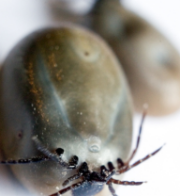

In [76]:
torchvision.transforms.functional.to_pil_image(box1)

In [77]:
box1.shape

torch.Size([3, 196, 180])

In [186]:
box1.shape

torch.Size([3, 256, 201])

In [96]:
here = torch.ones(1, 6, 6)
here

tensor([[[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]])

In [97]:
here2 = torch.rand(1, 4, 4)
here2

tensor([[[0.8901, 0.0229, 0.5755, 0.4892],
         [0.8623, 0.3977, 0.2074, 0.3262],
         [0.6320, 0.9985, 0.3314, 0.2584],
         [0.8362, 0.7003, 0.3626, 0.3550]]])

In [103]:
torch.stack([torch.rand(1, 12, 12), torch.rand(1, 12, 12)]).shape

torch.Size([2, 1, 12, 12])

In [98]:
(3-math.floor((here2.shape[2]/2)))

1

In [99]:
(3-math.ceil((here2.shape[2]/2)))

1

In [100]:
here[:, :here2.shape[1], (3-math.floor((here2.shape[2]/2))):(3+math.ceil((here2.shape[2]/2)))] = here2
here

tensor([[[1.0000, 0.8901, 0.0229, 0.5755, 0.4892, 1.0000],
         [1.0000, 0.8623, 0.3977, 0.2074, 0.3262, 1.0000],
         [1.0000, 0.6320, 0.9985, 0.3314, 0.2584, 1.0000],
         [1.0000, 0.8362, 0.7003, 0.3626, 0.3550, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]]])

In [187]:
torch.nn.functional.interpolate(mask1.unsqueeze(0), scale_factor=2).shape

torch.Size([1, 1, 512, 402])

In [142]:
torchvision.transforms.functional.to_pil_image(box1)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7feb0bb3f9a0>
Traceback (most recent call last):
  File "/home/sarmst/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/sarmst/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1442, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7feb0b

ValueError: not enough image data

In [ ]:
torchvision.transforms.functional.to_pil_image(box1)

In [67]:
time_list = []
for ind, data in enumerate(loader):
    imgs = data[0]
    paths = data[-1]
    for ind, path in enumerate(paths): 
        folder = path.split(".")[0].replace("imagenet", "imagenet_masks")
        filename = folder + "/" + folder.split("/")[-1] + ".JPEG"
        os.makedirs(folder, exist_ok=True)
        torchvision.transforms.functional.to_pil_image(data[0][ind]).save(filename)
                
    if ind % 100 == 0:
        print(ind/len(loader))

Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/usr/lib/python3.10/shutil.py", line 731, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/usr/lib/python3.10/shutil.py", line 729, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-81xmyfbl'


TypeError: split_with_sizes(): argument 'split_sizes' (position 2) must be tuple of ints, not str

In [121]:
folder.split("/")[-1]

'n15075141_9993'

In [119]:
filename

'/Work1/imagenet_masks/train/n15075141/n15075141_9993/.png'

In [11]:
def mask_center(dim_one, border_thickness=1):
    mask_center = np.ones((dim_one, 16, 16))
    mask_center[:, :, :border_thickness] = 0
    mask_center[:, :, -border_thickness:] = 0
    mask_center[:, :border_thickness, :] = 0
    mask_center[:, -border_thickness:, :] = 0
    return mask_center

In [13]:
time_list = []
for ind, data in enumerate(loader):
    start_time = time.time()
    imgs = data[0].permute(0, 2, 3, 1).numpy()
    label = data[1].numpy()
    path = data[3]
    latent_mask = mask_center(imgs.shape[0])
    print(latent_mask.shape)
    break

(4, 16, 16)


In [122]:
torch.stack((torch.stack([torch.full((1, 2, 2), 1),torch.full((1, 2, 2), 2)]),torch.stack([torch.full((1, 2, 2), 3),torch.full((1, 2, 2), 4)]))).reshape(4,  2, 2)

tensor([[[1, 1],
         [1, 1]],

        [[2, 2],
         [2, 2]],

        [[3, 3],
         [3, 3]],

        [[4, 4],
         [4, 4]]])

In [127]:
here = [1, 2,]
for i in here:
    [i,]*

[1, 2, 1, 2]

In [124]:
for i in range(1, 9+1):
    print(i)

1
2
3
4
5
6
7
8
9


In [37]:
def aug0(imgs):
    mask_center = np.ones((imgs.shape[0], 16, 16))
    return imgs, mask_center, "aug0"

In [64]:
def aug1(imgs):
    mask_outer = np.zeros((imgs.shape[0], 16, 16))
    mask_outer[:, (mask_outer.shape[1]//4):((mask_outer.shape[1]//4)*3), (mask_outer.shape[2]//4):((mask_outer.shape[2]//4)*3)] = 1
    reverse_crop_center = torch.zeros_like(imgs)
    reverse_crop_center[:, :, (imgs.shape[2]//4):((imgs.shape[2]//4)*3), (imgs.shape[3]//4):((imgs.shape[3]//4)*3)] = torch.nn.functional.interpolate(imgs, size=((imgs.shape[2]//2), (imgs.shape[3]//2)), mode="bilinear", align_corners=True)
    return reverse_crop_center, mask_outer, "aug1"

In [37]:
def aug2(imgs):
    unit = 1
    mask_upper_left = np.ones((imgs.shape[0], 16, 16))
    mask_upper_left[:, :(mask_upper_left.shape[1]//2), :(mask_upper_left.shape[2]//2)] = 0
    reverse_crop_upper_left = torch.zeros_like(imgs)
    reverse_crop_upper_left[:, :, :-((imgs.shape[2]//2)-unit), :-((imgs.shape[3]//2)-unit)] = torch.nn.functional.interpolate(imgs, size=(((imgs.shape[2]//2)+unit), ((imgs.shape[3]//2)+unit)), mode="bilinear", align_corners=True)
    return reverse_crop_upper_left, mask_upper_left, "aug2.JPEG"

In [72]:
def aug3(imgs):
    mask_upper_right = np.zeros((imgs.shape[0], 16, 16))
    mask_upper_right[:, :(mask_upper_right.shape[1]//2), (mask_upper_right.shape[2]//2):] = 1
    reverse_crop_upper_right = torch.zeros_like(imgs)
    reverse_crop_upper_right[:, :, :(imgs.shape[2]//2), (imgs.shape[3]//2):] = torch.nn.functional.interpolate(imgs, size=((imgs.shape[2]//2), (imgs.shape[3]//2)), mode="bilinear", align_corners=True)
    return reverse_crop_upper_right, mask_upper_right, "aug3"

In [76]:
def aug4(imgs):
    mask_lower_right = np.zeros((imgs.shape[0], 16, 16))
    mask_lower_right[:, (mask_lower_right.shape[1]//2):, (mask_lower_right.shape[2]//2):] = 1
    reverse_crop_lower_right = torch.zeros_like(imgs)
    reverse_crop_lower_right[:, :, (imgs.shape[2]//2):, (imgs.shape[3]//2):] = torch.nn.functional.interpolate(imgs, size=((imgs.shape[2]//2), (imgs.shape[3]//2)), mode="bilinear", align_corners=True)
    return reverse_crop_lower_right, mask_lower_right, "aug4"

In [80]:
def aug5(imgs):
    mask_lower_left = np.zeros((imgs.shape[0], 16, 16))
    mask_lower_left[:, (mask_lower_left.shape[1]//2):, :(mask_lower_left.shape[2]//2)] = 1
    reverse_crop_lower_left = torch.zeros_like(imgs)
    reverse_crop_lower_left[:, :, (imgs.shape[2]//2):, :(imgs.shape[3]//2)] = torch.nn.functional.interpolate(imgs, size=((imgs.shape[2]//2), (imgs.shape[3]//2)), mode="bilinear", align_corners=True)
    return reverse_crop_lower_left, mask_lower_left, "aug5"

In [67]:
def aug6(imgs):
    mask_center = np.ones((imgs.shape[0], 16, 16))
    mask_center[:, :, :1] = 0
    mask_center[:, :, -1:] = 0
    mask_center[:, :1, :] = 0
    mask_center[:, -1:, :] = 0
    return imgs, mask_center, "aug6"

In [41]:
def aug7(imgs):
    mask_center = np.ones((imgs.shape[0], 16, 16))
    mask_center[:, :, :1] = 0
    mask_center[:, :, -1:] = 0
    mask_center[:, :1, :] = 0
    mask_center[:, -1:, :] = 0
    crop_center = torchvision.transforms.functional.crop(imgs, top= imgs.shape[2]//4, left=imgs.shape[3]//4, height=imgs.shape[2]//2, width= imgs.shape[3]//2) 
    crop_center = torch.nn.functional.interpolate(crop_center, size=(imgs.shape[2], imgs.shape[3]), mode="bilinear")
    return crop_center, mask_center, "aug7"

In [48]:
def aug8(imgs):
    mask_center = np.ones((imgs.shape[0], 16, 16))
    mask_center[:, :, :1] = 0
    mask_center[:, :, -1:] = 0
    mask_center[:, :1, :] = 0
    mask_center[:, -1:, :] = 0
    crop_upper_left = torchvision.transforms.functional.crop(imgs, top=0, left=0, height=imgs.shape[2]//2, width= imgs.shape[3]//2) 
    crop_upper_left = torch.nn.functional.interpolate(crop_upper_left, size=(imgs.shape[2], imgs.shape[3]), mode="bilinear")
    return crop_upper_left, mask_center, "aug8"

In [49]:
def aug9(imgs):
    mask_center = np.ones((imgs.shape[0], 16, 16))
    mask_center[:, :, :1] = 0
    mask_center[:, :, -1:] = 0
    mask_center[:, :1, :] = 0
    mask_center[:, -1:, :] = 0
    crop_upper_right = torchvision.transforms.functional.crop(imgs, top=0, left=imgs.shape[3]//2, height=imgs.shape[2]//2, width= imgs.shape[3]//2) 
    crop_upper_right = torch.nn.functional.interpolate(crop_upper_right, size=(imgs.shape[2], imgs.shape[3]), mode="bilinear")
    return crop_upper_right, mask_center, "aug9"

In [53]:
def aug10(imgs):
    mask_center = np.ones((imgs.shape[0], 16, 16))
    mask_center[:, :, :1] = 0
    mask_center[:, :, -1:] = 0
    mask_center[:, :1, :] = 0
    mask_center[:, -1:, :] = 0
    crop_lower_right = torchvision.transforms.functional.crop(imgs, top=imgs.shape[2]//2, left=imgs.shape[3]//2, height=imgs.shape[2]//2, width= imgs.shape[3]//2) 
    crop_lower_right = torch.nn.functional.interpolate(crop_lower_right, size=(imgs.shape[2], imgs.shape[3]), mode="bilinear")
    return crop_lower_right, mask_center, "aug10"

In [55]:
def aug11(imgs):
    mask_center = np.ones((imgs.shape[0], 16, 16))
    mask_center[:, :, :1] = 0
    mask_center[:, :, -1:] = 0
    mask_center[:, :1, :] = 0
    mask_center[:, -1:, :] = 0
    crop_lower_left = torchvision.transforms.functional.crop(imgs, top=imgs.shape[2]//2, left=0, height=imgs.shape[2]//2, width= imgs.shape[3]//2) 
    crop_lower_left = torch.nn.functional.interpolate(crop_lower_left, size=(imgs.shape[2], imgs.shape[3]), mode="bilinear")
    return crop_lower_left, mask_center, "aug11"

In [88]:
def aug5(imgs):
    unit = 1
    offset = 2
    mask_right = np.ones((imgs.shape[0], 16, 16))
    mask_right[:, (mask_right.shape[2]//4):((mask_right.shape[2]//4)*3), (mask_right.shape[1]//2):] = 0
    reverse_crop_center = torch.zeros_like(imgs)
    reverse_crop_center[:, :, ((imgs.shape[3]//4)-unit):-((imgs.shape[3]//4)-unit), (((imgs.shape[3]//2)-(2*unit))+offset):] = torch.nn.functional.interpolate(imgs, size=(((imgs.shape[3]//2)+(2*unit)), ((imgs.shape[3]//2)+(2*unit))), mode="bilinear", align_corners=True)[:, :, :, offset:]
    return reverse_crop_center, mask_right, "_aug5.JPEG"

In [89]:
imgs = torch.tensor([[[[11, 12, 13, 14, 15, 16, 17, 18],[21, 22, 23, 24, 25, 26, 27, 28], [31, 32, 33, 34, 35, 36, 37, 38], 
                       [41, 42, 43, 44, 45, 46, 47, 48], [51, 52, 53, 54, 55, 56, 57, 58], [61, 62, 63, 64, 65, 66, 67, 68],
                      [71, 72, 73, 74, 75, 76, 77, 78], [81, 82, 83, 84, 85, 86, 87, 88]]]]).float()
imgs = torch.nn.functional.interpolate(imgs, size=(16, 16), mode="bilinear", align_corners=True)

In [90]:
aug5(imgs)

(tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
             0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
             0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
             0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
             0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
             0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
             0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
             0.0000, 12.5556, 13.3333, 14.1111, 14.8889, 15.6667, 16.4444,
            17.2222, 18.0000],
           [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
             0.0000, 20.3333, 21.1111, 21.8889, 22.6667, 23.4444, 24.2222,
            25.0000, 25.7778],
           [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
             0.0000,

In [35]:
here2[:, :, 1:, :]

tensor([[[[4, 5]]]])

In [32]:
here2

tensor([[[[1, 2],
          [4, 5]]]])

In [3]:
from glob import glob
import os

In [2]:
aug1 = glob("/Work1/SwaG/train/*/*/*_R.JPEG")

In [5]:
for filename1 in aug1:
    os.rename(filename1, filename1.replace("_R.JPEG", "_0.JPEG"))

In [6]:
aug2 = glob("/Work1/SwaG/train/*/*/*_0_G.JPEG")

In [7]:
for filename2 in aug2:
    os.rename(filename2, filename2.replace("_0_G.JPEG", "_6.JPEG"))

In [44]:
mask_left = np.ones((imgs.shape[0], 16, 16))
mask_left[:, (mask_left.shape[2]//4):((mask_left.shape[2]//4)*3), :(mask_left.shape[1]//2)] = 0

In [45]:
mask_left

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1

In [136]:
here = torch.zeros(1, 1, 16, 16)

In [137]:
here[:, :, 2:-2, 2:-2]  = 1
here

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
          [0